In [ ]:
# no environment!

In [1]:
# pip install flopy

In [2]:
# pip install gstools

In [3]:
# pip install kornia

In [4]:
# pip install --upgrade ipywidgets

In [5]:
import kornia
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget
import ipympl
from scipy.special import erfc as erfc
from scipy.special import erf as erf
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)  # print (erfc(1))    # print(erfc(0))

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [6]:
x = np.linspace(0, 1, num=2000)       # (x,y)
t, Df, C0 = 1/10, 5E-9, 1 
def diffusion_fun(x, t_month, Df, C0):
    t = 60*60*24*t_month
    C11 = C0*(erfc((x)/(2*np.sqrt(Df*t))))
    return C11
C2 = diffusion_fun(x, t, Df, C0)      # plt.figure(dpi=100)      # plt.plot(x, C)        # plt.show()  # WHy C2 again?
def diffusion_fun_erf(x, t_month, Df, C0):
    t = 60*60*24*t_month
    C2 = C0*(1-erf((x)/(2*np.sqrt(Df*t))))
    return C2                                     # Conc.f(x)

interactive(children=(FloatSlider(value=12.0, description='t_month', max=120.0, min=0.0001, step=1.0), Output(…

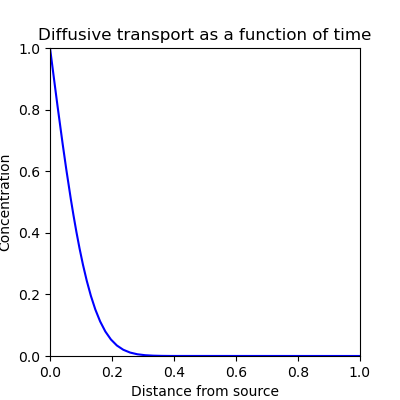

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim([0, 1]); ax.set_ylim([0, 1]); ax.set_xlabel('Distance from source');ax.set_ylabel('Concentration'); ax.set_title('Diffusive transport as a function of time')
@widgets.interact(t_month=(1e-4, 120, 1))       
def update(t_month = 12):                        # t_month = 12               
    [l.remove() for l in ax.lines]
    ax.plot(C2, diffusion_fun_erf(C2, t_month, Df, C0=1), color='blue')                   # C = Concentration

**See [Error function](https://en.wikipedia.org/wiki/Error_function).**